# Setup Environment and Download Data
## BƯỚC 1: Clone code và cài đặt package

In [1]:
import os
os.chdir('/content')
!pwd
!rm -rf /content/python_imageNet
!git clone -b trung https://github.com/CodeWithVu/python_imageNet.git /content/python_imageNet
%cd /content/python_imageNet
!pip install -q -e .


/content
Cloning into '/content/python_imageNet'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 140 (delta 40), reused 41 (delta 31), pack-reused 83 (from 1)
Receiving objects: 100% (140/140), 14.42 MiB | 15.71 MiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/python_imageNet
ERROR: file:///content/python_imageNet does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


## BƯỚC 2: Upload và cấu hình Kaggle API
### Hướng dẫn lấy kaggle.json:
1. Vào https://www.kaggle.com
2. Settings → API → "Create New API Token"
3. Tải file `kaggle.json` về máy
4. Chạy cell dưới đây và upload file kaggle.json khi được yêu cầu

In [15]:
import os, json
os.makedirs('/root/.kaggle', exist_ok=True)
creds = {"username":"nguynanhvdct122c4","key":"500061e5f39de8aed58366913a2ce3e9"}
with open('/root/.kaggle/kaggle.json','w') as f:
    json.dump(creds, f)
!chmod 600 /root/.kaggle/kaggle.json
!cat /root/.kaggle/kaggle.json          # kiểm tra
!kaggle competitions list

{"username": "nguynanhvdct122c4", "key": "500061e5f39de8aed58366913a2ce3e9"}ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd        311           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       2711           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           100,000 Usd        197           False  
https://www.kaggle.com/competitions/google-tunix-hackathon                          2026-01-12 23:5

## BƯỚC 3: Tải dataset AID từ Kaggle (chạy trên cloud)

In [16]:
# Kiểm tra nếu data đã tải rồi thì skip
if not os.path.exists('./dataset/AID'):
    print(" Đang tải dataset từ Kaggle...")
    !kaggle datasets download -d jiayuanchengala/aid-scene-classification-datasets -p ./dataset --force

    print(" Đang giải nén...")
    !unzip -q ./dataset/aid-scene-classification-datasets.zip -d ./dataset

    print("Dataset ready!")
else:
    print(" Dataset already exists")

sdir = './dataset/AID'
print(f"📁 Data path: {sdir}")

 Đang tải dataset từ Kaggle...
Dataset URL: https://www.kaggle.com/datasets/jiayuanchengala/aid-scene-classification-datasets
License(s): CC0-1.0
 99% 2.43G/2.45G [01:20<00:00, 50.3MB/s]
100% 2.45G/2.45G [01:20<00:00, 32.7MB/s]
 Đang giải nén...
Dataset ready!
📁 Data path: ./dataset/AID


In [17]:
print(sdir)

./dataset/AID


In [18]:
# liệt kê thư mục gốc và 1-level subfolders
!ls -la ./dataset/AID
!find ./dataset/AID -maxdepth 2 -type d | sed -n '1,200p'

# đếm số file theo class (folder)
!find ./dataset/AID -type f | sed -E 's#^.*/([^/]+)/.*$#\1#' | sort | uniq -c | sort -nr | head -200

total 496
drwxr-xr-x 32 root root  4096 Nov 26 16:01 .
drwxr-xr-x  3 root root  4096 Nov 26 16:00 ..
drwxr-xr-x  2 root root 20480 Nov 26 16:00 Airport
drwxr-xr-x  2 root root 12288 Nov 26 16:00 BareLand
drwxr-xr-x  2 root root 12288 Nov 26 16:00 BaseballField
drwxr-xr-x  2 root root 20480 Nov 26 16:00 Beach
drwxr-xr-x  2 root root 16384 Nov 26 16:00 Bridge
drwxr-xr-x  2 root root 12288 Nov 26 16:01 Center
drwxr-xr-x  2 root root 12288 Nov 26 16:01 Church
drwxr-xr-x  2 root root 20480 Nov 26 16:01 Commercial
drwxr-xr-x  2 root root 20480 Nov 26 16:01 DenseResidential
drwxr-xr-x  2 root root 12288 Nov 26 16:01 Desert
drwxr-xr-x  2 root root 20480 Nov 26 16:01 Farmland
drwxr-xr-x  2 root root 12288 Nov 26 16:01 Forest
drwxr-xr-x  2 root root 20480 Nov 26 16:01 Industrial
drwxr-xr-x  2 root root 12288 Nov 26 16:01 Meadow
drwxr-xr-x  2 root root 20480 Nov 26 16:01 MediumResidential
drwxr-xr-x  2 root root 16384 Nov 26 16:01 Mountain
drwxr-xr-x  2 root root 12288 Nov 26 16:01 Park
drwxr-xr-

In [19]:
!find ./dataset/AID -type f | sed -n '1,50p'

./dataset/AID/Meadow/meadow_161.jpg
./dataset/AID/Meadow/meadow_75.jpg
./dataset/AID/Meadow/meadow_198.jpg
./dataset/AID/Meadow/meadow_237.jpg
./dataset/AID/Meadow/meadow_15.jpg
./dataset/AID/Meadow/meadow_68.jpg
./dataset/AID/Meadow/meadow_238.jpg
./dataset/AID/Meadow/meadow_187.jpg
./dataset/AID/Meadow/meadow_146.jpg
./dataset/AID/Meadow/meadow_23.jpg
./dataset/AID/Meadow/meadow_51.jpg
./dataset/AID/Meadow/meadow_155.jpg
./dataset/AID/Meadow/meadow_148.jpg
./dataset/AID/Meadow/meadow_275.jpg
./dataset/AID/Meadow/meadow_37.jpg
./dataset/AID/Meadow/meadow_225.jpg
./dataset/AID/Meadow/meadow_96.jpg
./dataset/AID/Meadow/meadow_173.jpg
./dataset/AID/Meadow/meadow_182.jpg
./dataset/AID/Meadow/meadow_179.jpg
./dataset/AID/Meadow/meadow_49.jpg
./dataset/AID/Meadow/meadow_2.jpg
./dataset/AID/Meadow/meadow_246.jpg
./dataset/AID/Meadow/meadow_26.jpg
./dataset/AID/Meadow/meadow_177.jpg
./dataset/AID/Meadow/meadow_118.jpg
./dataset/AID/Meadow/meadow_102.jpg
./dataset/AID/Meadow/meadow_89.jpg
./da

In [20]:
!find ./dataset/AID -type f | awk -F'/' '{print $(NF-1)}' | sort | uniq -c | sort -nr | head -200

    420 Viaduct
    420 Pond
    410 River
    410 DenseResidential
    400 Beach
    390 Parking
    390 Industrial
    380 Port
    370 Playground
    370 Farmland
    360 StorageTanks
    360 Bridge
    360 Airport
    350 Park
    350 Commercial
    340 Mountain
    330 Square
    310 BareLand
    300 SparseResidential
    300 School
    300 Desert
    290 Stadium
    290 Resort
    290 MediumResidential
    280 Meadow
    260 RailwayStation
    260 Center
    250 Forest
    240 Church
    220 BaseballField


In [21]:
import os, collections
root='./dataset/AID'
counts=collections.Counter()
for parent in os.listdir(root):
    p=os.path.join(root,parent)
    if os.path.isdir(p):
        for f in os.listdir(p):
            if f.lower().endswith(('.jpg','.jpeg','.png')):
                counts[parent]+=1
print(sorted(counts.items(), key=lambda x:-x[1])[:20])

[('Pond', 420), ('Viaduct', 420), ('DenseResidential', 410), ('River', 410), ('Beach', 400), ('Parking', 390), ('Industrial', 390), ('Port', 380), ('Playground', 370), ('Farmland', 370), ('StorageTanks', 360), ('Bridge', 360), ('Airport', 360), ('Commercial', 350), ('Park', 350), ('Mountain', 340), ('Square', 330), ('BareLand', 310), ('SparseResidential', 300), ('School', 300)]


Classes: 30 Total images: 10000
Top 5: [('Pond', 420), ('Viaduct', 420), ('DenseResidential', 410), ('River', 410), ('Beach', 400)]


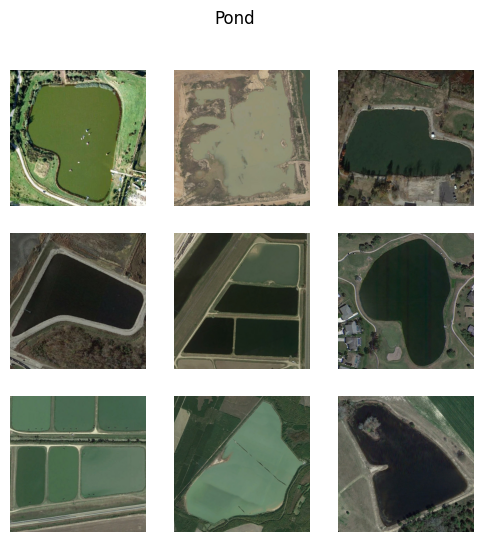

In [22]:
# filepath: d:\Workspace\University\hoc-ky-1-nam-4\python\doAn\notebooks\main_colab.ipynb
# ...existing code...
import os, collections, random
from PIL import Image
import matplotlib.pyplot as plt

root = './dataset/AID'
counts = {
    c: sum(1 for f in os.listdir(os.path.join(root, c))
           if f.lower().endswith(('.jpg', '.jpeg', '.png')))
    for c in os.listdir(root) if os.path.isdir(os.path.join(root, c))
}

print('Classes:', len(counts), 'Total images:', sum(counts.values()))
print('Top 5:', sorted(counts.items(), key=lambda x: -x[1])[:5])

top = sorted(counts, key=lambda x: -counts[x])[0]
files = [os.path.join(root, top, f) for f in os.listdir(os.path.join(root, top))
         if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:9]

plt.figure(figsize=(6,6))
for i, f in enumerate(files):
    plt.subplot(3,3,i+1); plt.imshow(Image.open(f)); plt.axis('off')
plt.suptitle(top); plt.show()
# ...existing code...

---
# Main Training Pipeline
## Import các module cần thiết

In [23]:
import sys
sys.path.append('/content/python_imageNet/src')

from doan.data_loading import create_dataframe
from doan.data_analysis import analyze_dataset
from doan.data_trimming import trim_dataframe
from doan.generators import create_generators
from doan.model_creation import create_model
from doan.callbacks_setup import create_callbacks  # quan trọng
from doan.training import train_model
from doan.visualization import plot_training_data, show_image_samples
from doan.evaluation import predictor, save_model


## Load và phân tích dataset

In [24]:
df = create_dataframe(sdir)
print(f'Dataset loaded: {df.shape}')

classes, class_count = analyze_dataset(df)
print(f'🏷️  Found {class_count} classes')
print(f'Classes: {classes[:5]}... (showing first 5)')

Dataset loaded: (10000, 2)
            CLASS               IMAGE COUNT 
           Airport                  360     
           BareLand                 310     
        BaseballField               220     
            Beach                   400     
            Bridge                  360     
            Center                  260     
            Church                  240     
          Commercial                350     
       DenseResidential             410     
            Desert                  300     
           Farmland                 370     
            Forest                  250     
          Industrial                390     
            Meadow                  280     
      MediumResidential             290     
           Mountain                 340     
             Park                   350     
           Parking                  390     
          Playground                370     
             Pond                   420     
             Port           

## Cân bằng dữ liệu (Data Trimming)

In [25]:
# QUAN TRỌNG: Phải SPLIT TRƯỚC, TRIM SAU (giống notebook gốc!)
# Notebook gốc: split df → trim train_df only
# Sai lầm trước đó: trim df → split (làm mất cân bằng valid/test)

from sklearn.model_selection import train_test_split

# BƯỚC 1: Split TRƯỚC (trên df gốc, chưa trim)
train_df, dummy_df = train_test_split(df, train_size=0.9, shuffle=True, random_state=123, stratify=df['labels'])
valid_df, test_df = train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])

print(f'TRƯỚC trim - Train: {len(train_df)}, Valid: {len(valid_df)}, Test: {len(test_df)}')

# BƯỚC 2: Trim CHỈ train_df SAU khi đã split (giống notebook gốc!)
max_samples = 250
min_samples = 50
train_df = trim_dataframe(train_df, max_samples, min_samples, 'labels')

print(f'SAU trim - Train: {len(train_df)}, Valid: {len(valid_df)}, Test: {len(test_df)}')

TRƯỚC trim - Train: 9000, Valid: 500, Test: 500
after trimming, the maximum samples in any class is now  250  and the minimum samples in any class is  50
SAU trim - Train: 7357, Valid: 500, Test: 500


## Chia dataset và tạo generators

In [ ]:
# train_df, valid_df, test_df đã được tạo ở cell trước
# Không cần split lại!

# Create generators
img_size = (200, 200)  # Giống notebook gốc
batch_size = 30  # Giống notebook gốc
train_gen, valid_gen, test_gen, classes, class_count, test_steps = create_generators(train_df, valid_df, test_df, img_size, batch_size)
print(f'✅ Generators created')
print(f'📊 Classes: {class_count}, Train steps: {len(train_df)//batch_size}')

In [ ]:
# DEBUG: Kiểm tra ảnh đầu vào có đúng range [0-255] không
import numpy as np
images, labels = next(train_gen)
print(f"🔍 DEBUG Image stats:")
print(f"   - Shape: {images.shape}")
print(f"   - Min: {images.min():.2f}, Max: {images.max():.2f}")
print(f"   - Mean: {images.mean():.2f}, Std: {images.std():.2f}")
print(f"   - Labels shape: {labels.shape}")

# Kiểm tra xem có rescale không
if images.max() <= 1.0:
    print("⚠️ CẢNH BÁO: Ảnh đã bị rescale về [0-1]! EfficientNet cần [0-255]!")
else:
    print("✅ Ảnh đúng range [0-255]")

## Tạo mô hình EfficientNetB3

In [ ]:
# Create EfficientNetB3 model
model = create_model(img_size + (3,), class_count)
model.summary()

## Huấn luyện mô hình

In [ ]:
# Setup callbacks - Keras 3.x không cần truyền model
epochs = 40
ask_epoch = 5
callbacks = create_callbacks(epochs, ask_epoch)  # Bỏ tham số model

# Train model
print("🚀 Starting training...")
history = train_model(model, train_gen, valid_gen, epochs, callbacks)
print("✅ Training completed!")

## Visualization

In [ ]:
# Plot training history
plot_training_data(history, 0)

# Show sample images
show_image_samples(train_gen)

## Đánh giá và lưu mô hình

In [ ]:
# Predict và evaluate
errors, tests = predictor(model, test_gen, test_steps, classes)

# Save model to Colab (hoặc Google Drive nếu đã mount)
save_dir = '/content/models'  # Hoặc '/content/drive/MyDrive/DoAn_Models' nếu mount Drive
os.makedirs(save_dir, exist_ok=True)

# Thay accuracy thực tế sau khi test
save_model(model, 'efficientnet_b3_aid', 95.5, save_dir)
print(f"✅ Model saved to {save_dir}")